<a href="https://colab.research.google.com/github/RichaGaharwar/Aerofit-project/blob/main/Aerofit_descriptive_statistics_%26_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit_treadmill.csv

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("aerofit_treadmill.csv")
df

--2024-09-09 06:39:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.160.146.28, 18.160.146.45, 18.160.146.106, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.160.146.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-09-09 06:39:47 (273 MB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

#This dataset has 180 records and 9 attributes

In [ ]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: count, Length: 180, dtype: int64

In [ ]:
df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)


#there are 3 products: KP281, KP481 & KP781

In [ ]:
df.Product.value_counts(normalize='True')

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222



 #marginal probability
 # KP281 has highest sales, with contribution of 44%

In [ ]:
df.Gender.value_counts(normalize='True')


,proportion
Gender,
Male,0.577778
Female,0.422222


#60% of the customers are male

In [ ]:
df[df.Gender=="Male"]["Product"].value_counts(normalize="True")

,proportion
Product,
KP281,0.384615
KP781,0.317308
KP481,0.298077


In [ ]:
df[df.Gender=="Female"]["Product"].value_counts(normalize="True")


,proportion
Product,
KP281,0.526316
KP481,0.381579
KP781,0.092105


#more than 50% of female customers choose to buy KP281

In [ ]:
pd.crosstab(df.Gender, df.Product)

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33



#females are least interested in KP781, their main focus being kp281 first and KP481 later
#40% of male customers like KP281, and rest 60% have equal inclination towards KP481 & KP781

In [ ]:
df_num = df.select_dtypes(include=np.number)

In [ ]:
df_num.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Age,9.00
Education,2.00
Usage,1.00
Fitness,1.00
Income,14609.25
Miles,48.75


In [ ]:
outlier = df_num[((df_num < (Q1 - 1.5*IQR)) | (df_num > (Q3 - 1.5 * IQR)).any(axis = 1))]

In [ ]:
new_df = df_num[~df_num.isin(outlier)]
new_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,178.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.337079,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.932087,16506.684226,51.863605
min,18.000000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000



# Fitness column had a lower outlier

<Axes: xlabel='Age'>

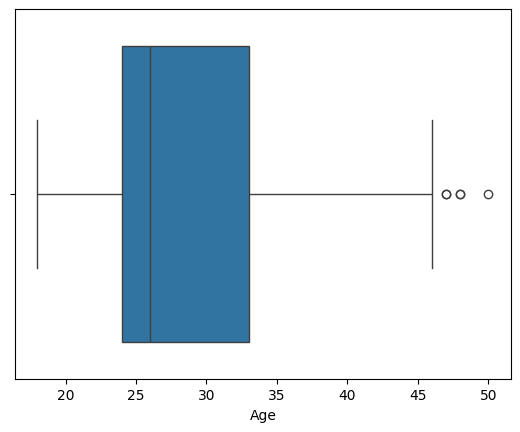

In [ ]:
sns.boxplot(data=df_num, x="Age")


# rage of majority customer's age is 18-50
#however, customers between the age group of 24 to 35 must be targeted highly

<Axes: xlabel='Education'>

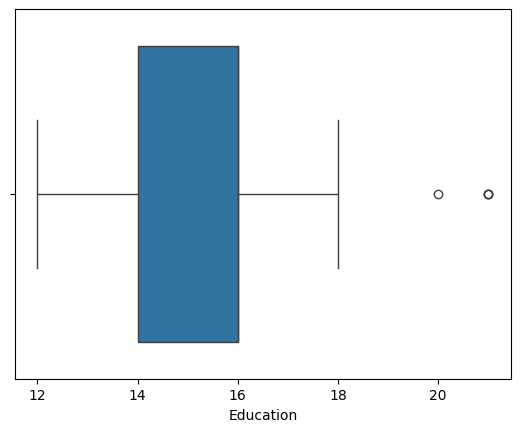

In [ ]:
sns.boxplot(data=df_num, x="Education")

<Axes: xlabel='Usage'>

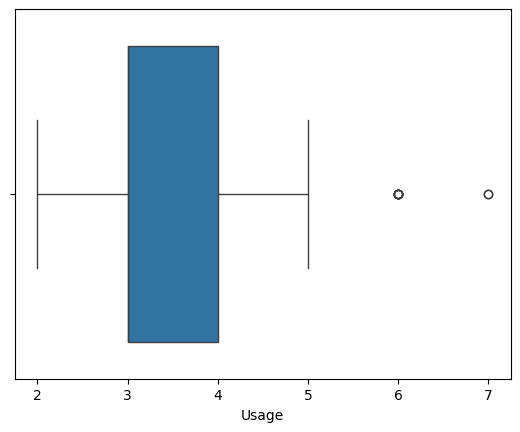

In [ ]:
sns.boxplot(data=df_num, x="Usage")

<Axes: xlabel='Fitness'>

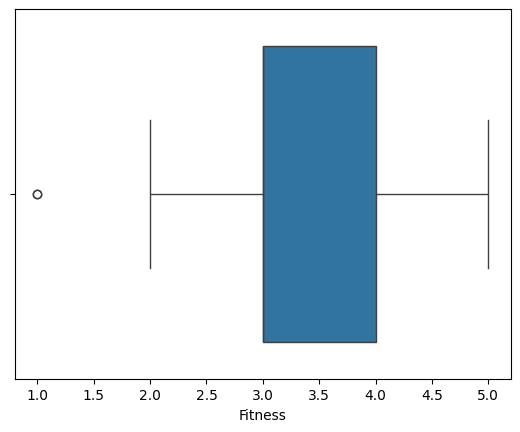

In [ ]:
sns.boxplot(data=df_num, x="Fitness")

<Axes: xlabel='Income'>

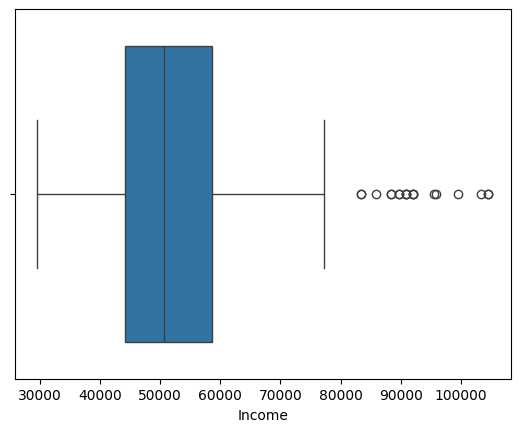

In [ ]:
sns.boxplot(data=df_num, x="Income")

<Axes: xlabel='Miles'>

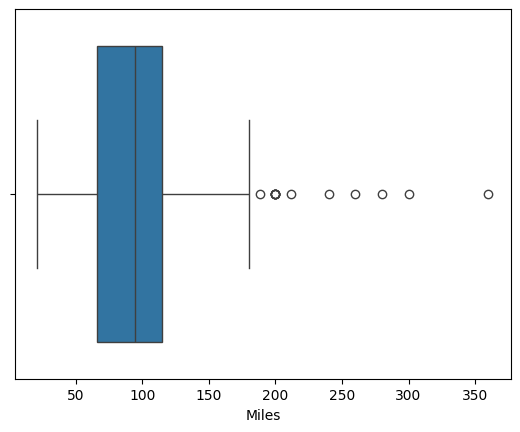

In [ ]:
sns.boxplot(data=df_num, x="Miles")

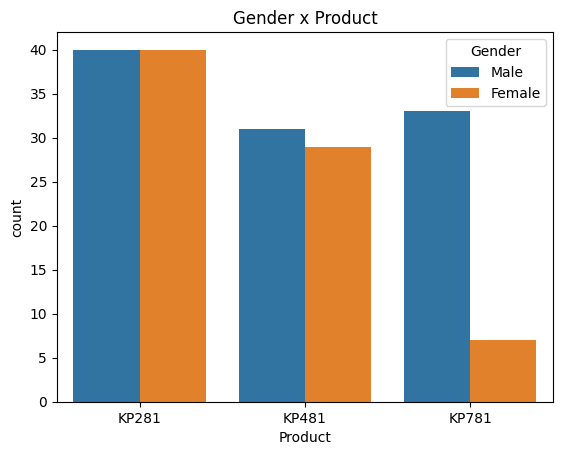

In [ ]:
plt.title("Gender x Product")
plt.xlabel("Product")
sns.countplot(x="Product", hue="Gender", data = df)
plt.show()

#insight#
#kp781 must be targeted more to male customers

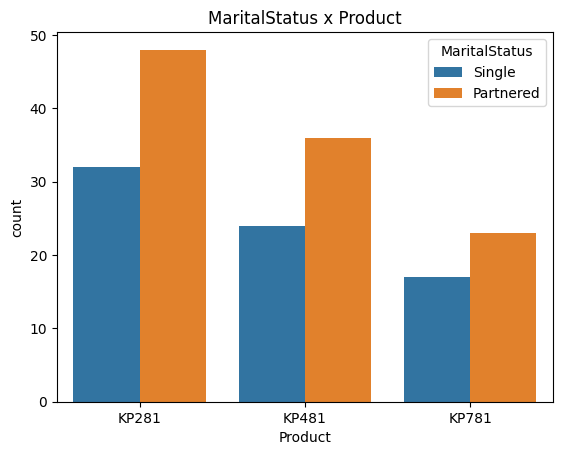

In [ ]:
plt.title("MaritalStatus x Product")
plt.xlabel("Product")
sns.countplot(x="Product", hue="MaritalStatus", data = df)
plt.show()

#customer having partners must be targeted specially for KP281

<Axes: xlabel='Income'>

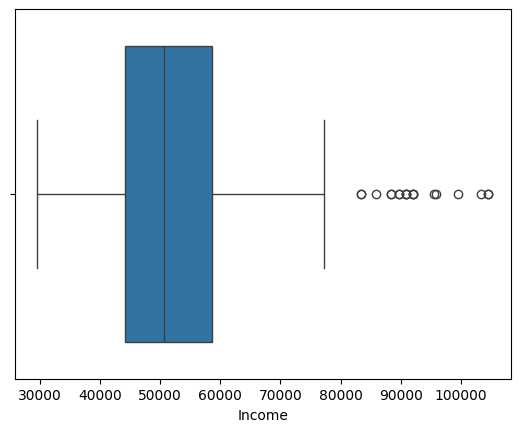

In [ ]:
sns.boxplot(data=df_num,
            x="Income")

<Axes: xlabel='Income', ylabel='Count'>

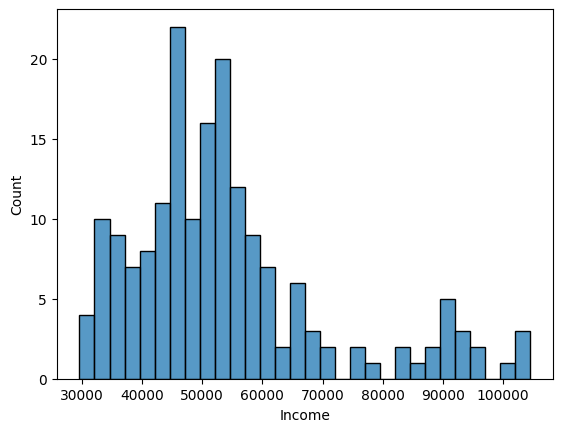

In [ ]:
sns.histplot(df["Income"], bins=30)

<Axes: >

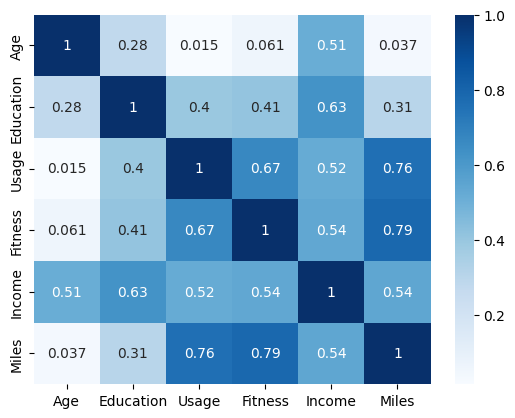

In [ ]:
df_num.corr()
sns.heatmap(df_num.corr(),
            cmap = "Blues",
            annot = True)

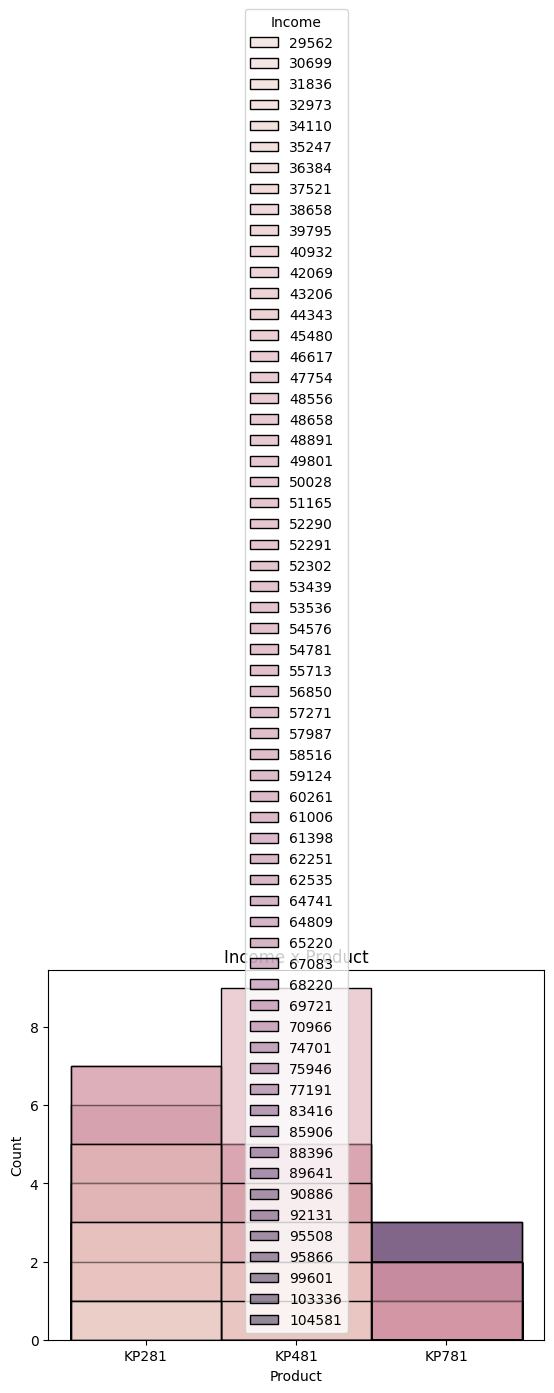

In [ ]:
plt.title("Income x Product")
plt.xlabel("Product")
sns.histplot(x="Product", hue="Income", data = df)
plt.show()

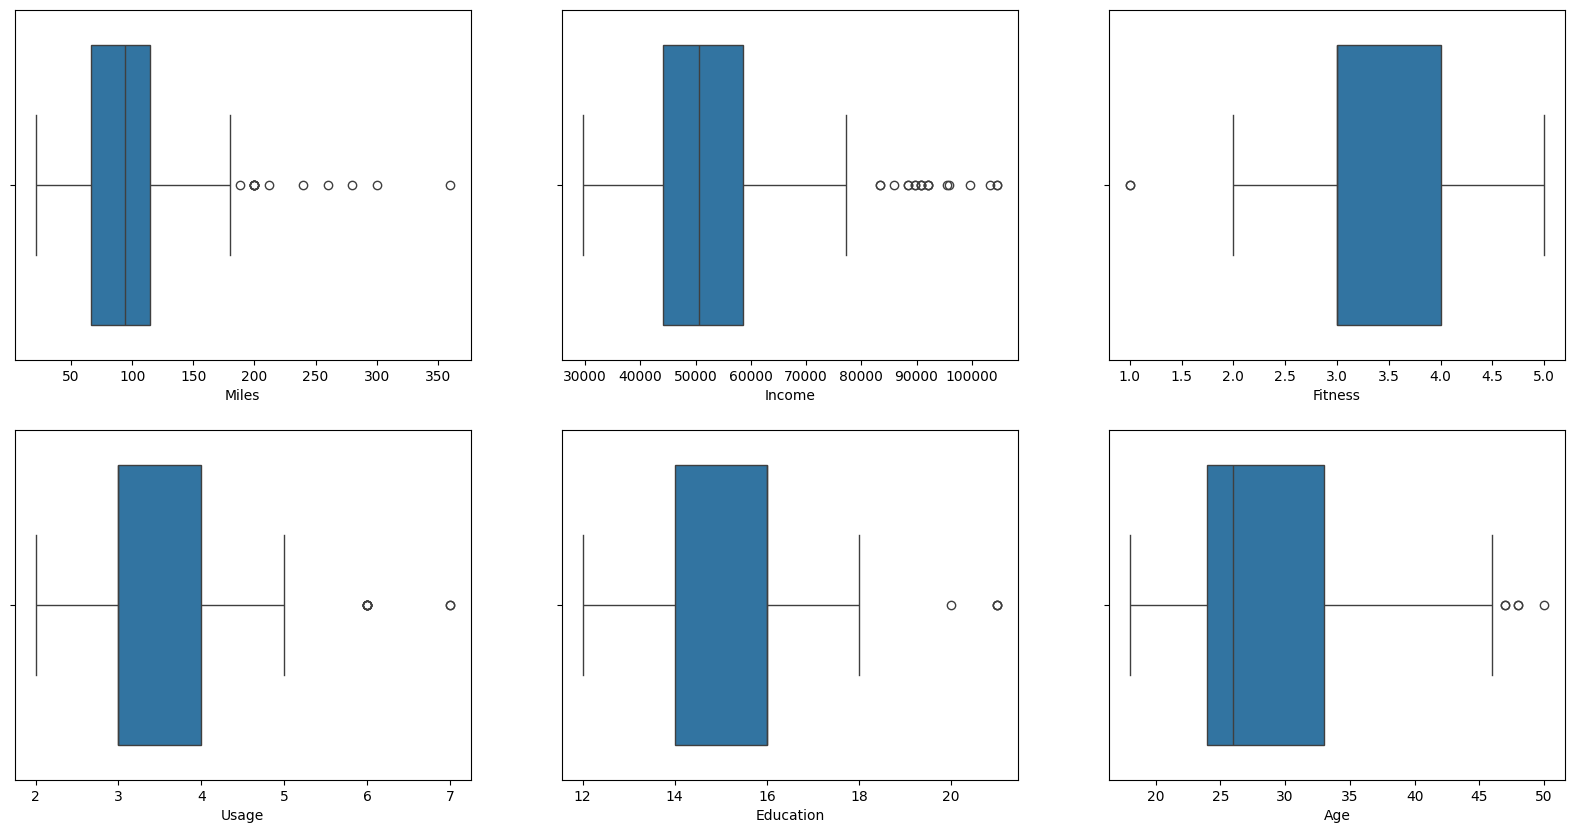

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df_num, x="Miles")
plt.subplot(2,3,2)
sns.boxplot(data=df_num, x="Income")
plt.subplot(2,3,3)
sns.boxplot(data=df_num, x="Fitness")
plt.subplot(2,3,4)
sns.boxplot(data=df_num, x="Usage")
plt.subplot(2,3,5)
sns.boxplot(data=df_num, x="Education")
plt.subplot(2,3,6)
sns.boxplot(data=df_num, x="Age")
plt.show()